In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
data = pd.read_csv('drive/MyDrive/Projekt/data.csv')

# Data exploration and analysis

The prediction target is
* Adaptivity level

The feature sets are:
* Gender
* Age
* Education Level
* Institution Type
* IT Student
* Location in Town
* Load-shedding
* Financial Condition
* Internet Type
* Network Type
* Class Duration
* Self LMS
* Device

Checking the shape of dataset

In [3]:
rows, columns = data.shape
print("Number of rows: ", rows)
print("Number of columns : ", columns)

Number of rows:  1205
Number of columns :  14


In [4]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [5]:
data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

Checking data types of columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


There aren't any null values

In [7]:
data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Ploting counts of all columns

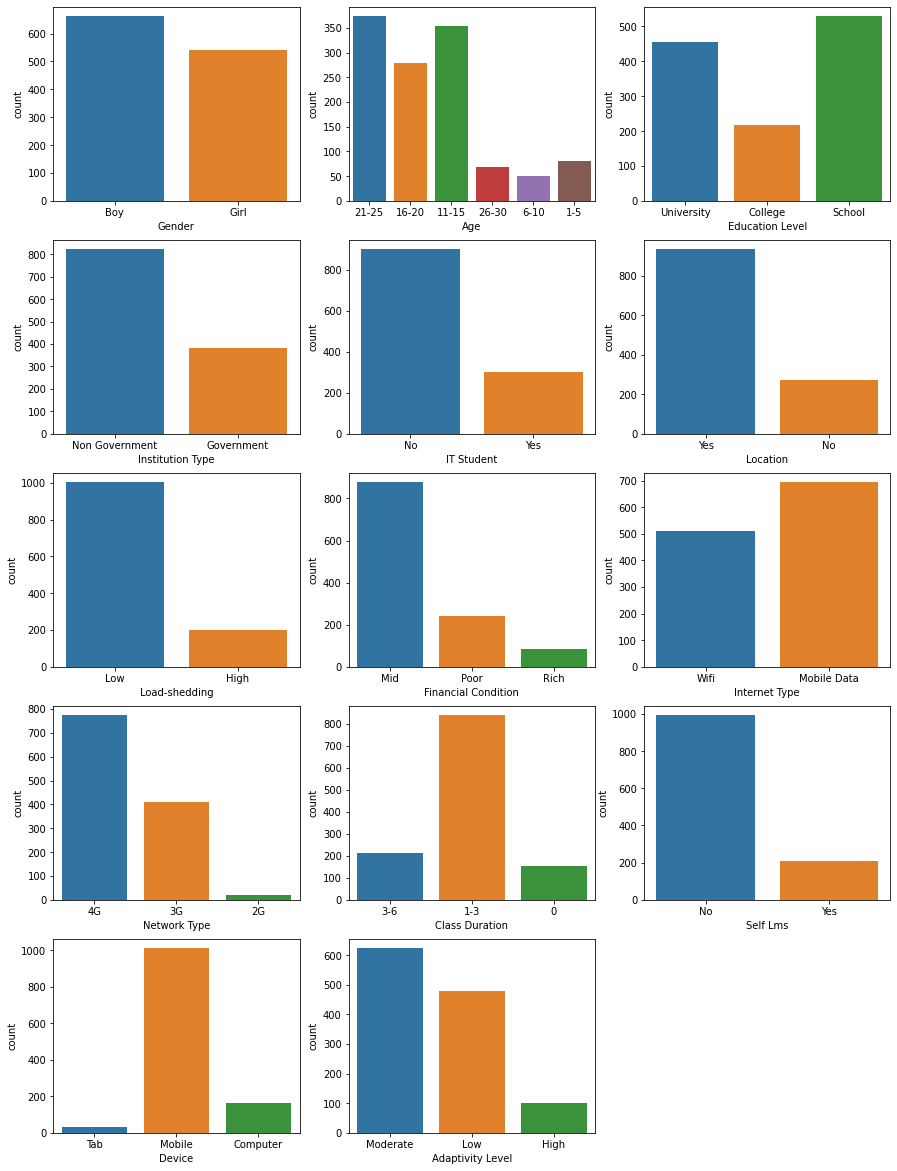

In [8]:
i = 1
plt.figure(figsize = (15,25))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data)
    i +=1

All features are categorical so we encode them as an integers for models to learn properly

In [9]:
from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder(dtype='int')
names = data.columns
d = scaler.fit_transform(data)

scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


Data types after encoding

In [10]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               1205 non-null   int64
 1   Age                  1205 non-null   int64
 2   Education Level      1205 non-null   int64
 3   Institution Type     1205 non-null   int64
 4   IT Student           1205 non-null   int64
 5   Location             1205 non-null   int64
 6   Load-shedding        1205 non-null   int64
 7   Financial Condition  1205 non-null   int64
 8   Internet Type        1205 non-null   int64
 9   Network Type         1205 non-null   int64
 10  Class Duration       1205 non-null   int64
 11  Self Lms             1205 non-null   int64
 12  Device               1205 non-null   int64
 13  Adaptivity Level     1205 non-null   int64
dtypes: int64(14)
memory usage: 131.9 KB


Displaying variable corelations

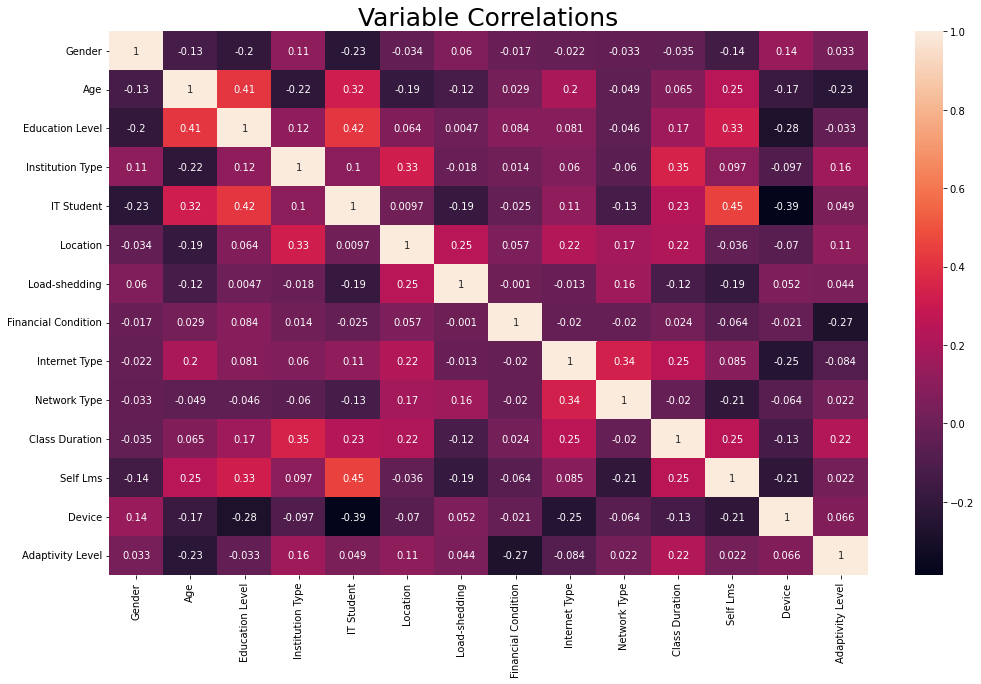

In [11]:
plt.figure(figsize=(17,10))
sns.heatmap(scaled_data.corr(),annot=True)
plt.title('Variable Correlations',fontsize=25)
plt.show()

We can see, that the biggest correlations with Adaptivity Level have Age, Financial Condition and Class Duration 

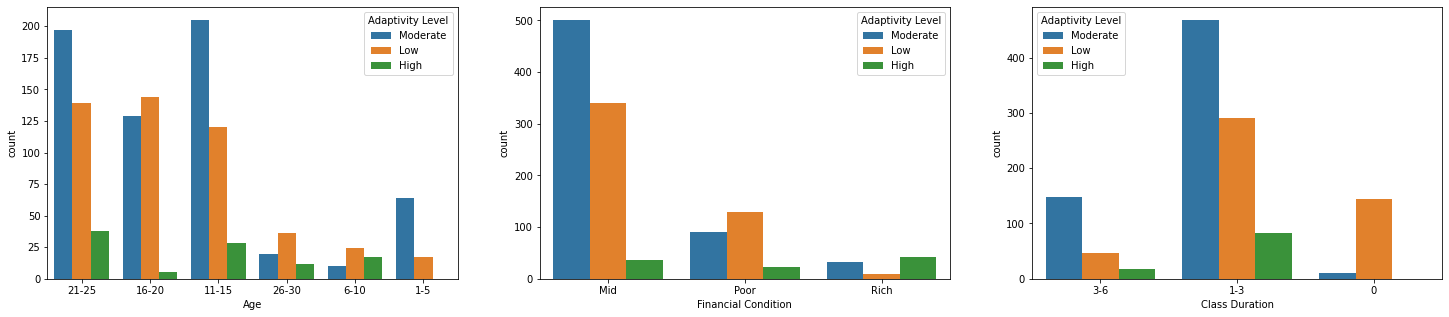

In [12]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.countplot(x = 'Age' , hue='Adaptivity Level', data = data)
plt.subplot(1,3,2)
sns.countplot(x = 'Financial Condition' , hue='Adaptivity Level', data = data)
plt.subplot(1,3,3)
sns.countplot(x = 'Class Duration' , hue='Adaptivity Level', data = data)

The least correlation have Education Level, IT Student, Load-shedding, Network Type, Self Lms and Device

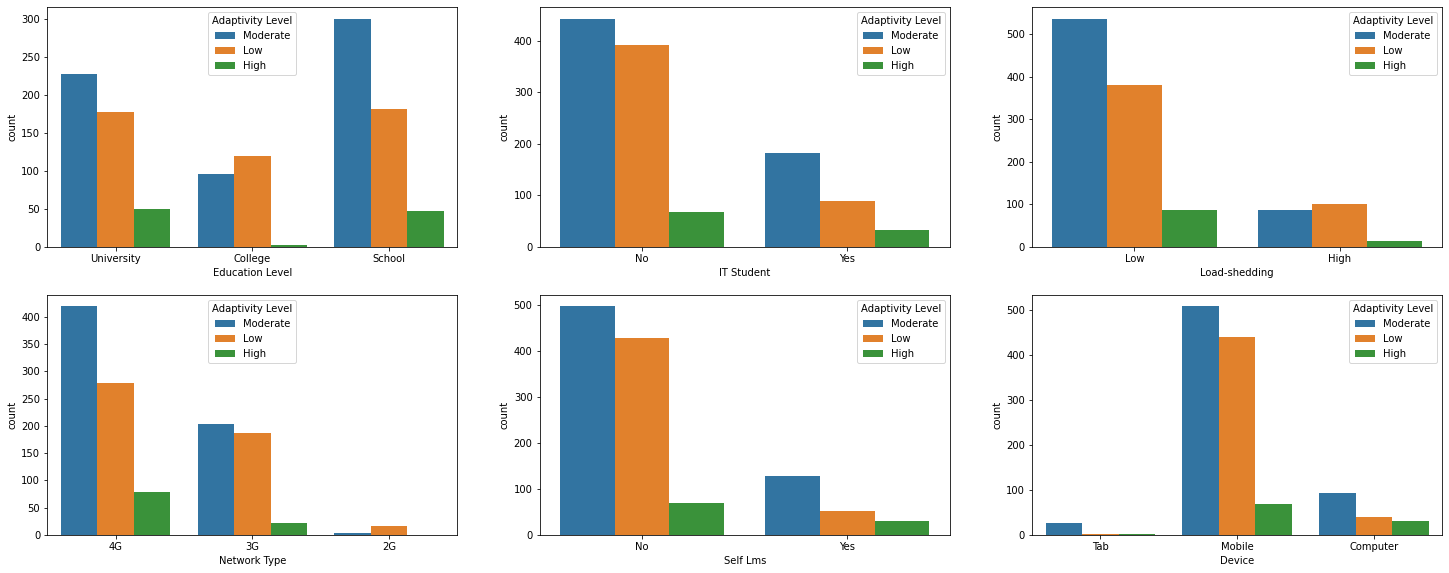

In [13]:
plt.figure(figsize=(25,15))

plt.subplot(3,3,1)
sns.countplot(x = 'Education Level' , hue='Adaptivity Level', data = data)
plt.subplot(3,3,2)
sns.countplot(x = 'IT Student' , hue='Adaptivity Level', data = data)
plt.subplot(3,3,3)
sns.countplot(x = 'Load-shedding' , hue='Adaptivity Level', data = data)

plt.subplot(3,3,4)
sns.countplot(x = 'Network Type' , hue='Adaptivity Level', data = data)
plt.subplot(3,3,5)
sns.countplot(x = 'Self Lms' , hue='Adaptivity Level', data = data)
plt.subplot(3,3,6)
sns.countplot(x = 'Device' , hue='Adaptivity Level', data = data)

The rest of variables

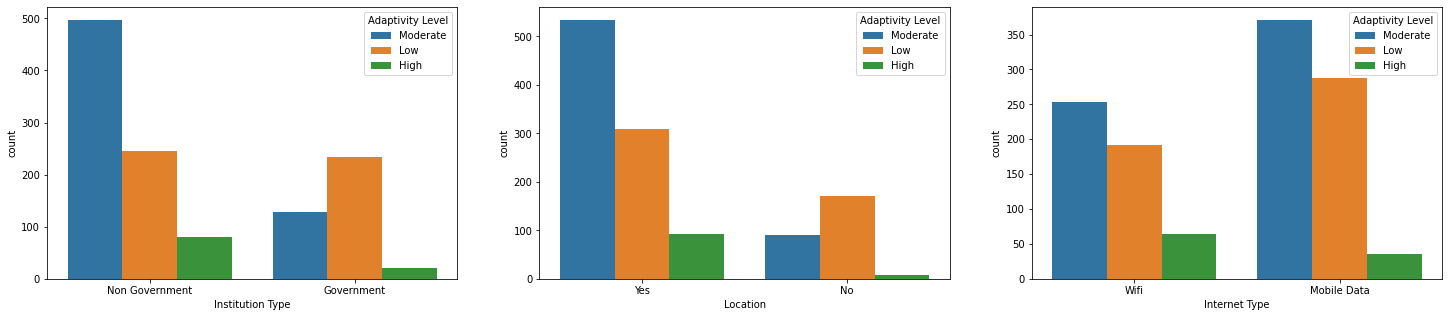

In [14]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.countplot(x = 'Institution Type' , hue='Adaptivity Level', data = data)
plt.subplot(1,3,2)
sns.countplot(x = 'Location' , hue='Adaptivity Level', data = data)
plt.subplot(1,3,3)
sns.countplot(x = 'Internet Type' , hue='Adaptivity Level', data = data)

The size of each Adaptivity Level class

In [15]:
data_counts = data['Adaptivity Level'].value_counts()
data_counts

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [16]:
print("Classes ratios:")
print("Mid : Low =", round(data_counts[0] / data_counts[1], 2), ': 1')
print("Mid : High =", round(data_counts[0] / data_counts[2], 2), ': 1')
print("Low : High =", round(data_counts[1] / data_counts[2], 2), ': 1')

Classes ratios:
Mid : Low = 1.3 : 1
Mid : High = 6.25 : 1
Low : High = 4.8 : 1


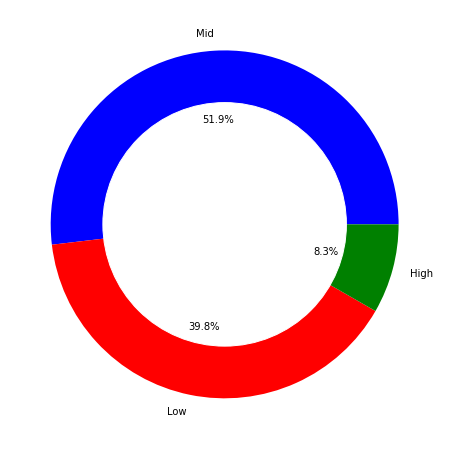

In [17]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data['Adaptivity Level'].value_counts(), labels=['Mid', 'Low', 'High'], colors=['blue', 'red', 'green'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(circle)

We can see that classes are imbalanced, specifically there are a lot less cases of High Adaptivity Level than the other ones, which means we are dealing with imbalanced classification. To help learning models learn all classes well, we're going to apply randomg oversampling to the smallest class.

In [18]:
# Divide by class
data_class_Low = scaled_data[scaled_data['Adaptivity Level']==1]
data_class_Mid = scaled_data[scaled_data['Adaptivity Level']==2]
data_class_High = scaled_data[scaled_data['Adaptivity Level']==0]

data_class_Low.shape

(480, 14)

In [19]:
data_class_Mid.shape

(625, 14)

In [20]:
data_class_High.shape

(100, 14)

In [21]:
count_resample = round((data_counts[0] + data_counts[1])/2)
count_resample

552

Over-sampling lower count class High

In [22]:
data_class_2_over = data_class_High.sample(count_resample, replace=True)
data_class_2_over.shape

(552, 14)

In [23]:
data_resampled = pd.concat([data_class_Low, data_class_Mid, data_class_2_over], axis=0)
data_resampled.shape

(1657, 14)

In [24]:
value_counts = data_resampled['Adaptivity Level'].value_counts()
value_counts

2    625
0    552
1    480
Name: Adaptivity Level, dtype: int64

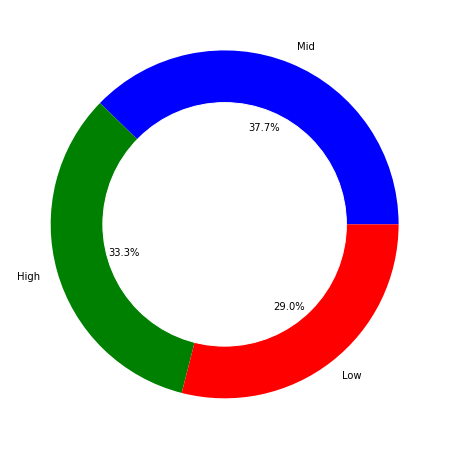

In [25]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data_resampled['Adaptivity Level'].value_counts(), labels=['Mid', 'High', 'Low'], colors=['blue', 'green', 'red'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(circle)

We can see that the classes are lot more balanced now.

In [26]:
data_resampled.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
5,0,1,1,1,0,1,1,1,0,1,1,0,1,1
6,0,1,1,1,0,1,1,0,1,2,0,0,1,1
8,0,2,0,0,0,1,1,0,1,2,1,0,1,1
10,1,2,2,0,0,1,1,0,1,2,1,0,1,1


# Classification Models

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

Split data int train and test sets

In [28]:
X = data_resampled.drop('Adaptivity Level', axis=1)
Y = data_resampled['Adaptivity Level']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

## Decision Tree Classification

In [29]:
decisionTreeModel = DecisionTreeClassifier(random_state=1)
decisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [30]:
pred = decisionTreeModel.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       119
           1       0.90      0.94      0.92        88
           2       0.96      0.85      0.90       125

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



## Random Forest Classification

In [31]:
randomForestModel = RandomForestClassifier(random_state=1)
randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [32]:
pred = randomForestModel.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       119
           1       0.89      0.95      0.92        88
           2       0.97      0.84      0.90       125

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



## XGBoost

In [33]:
from xgboost import XGBClassifier

In [49]:
XGBModel = XGBClassifier(n_estimators=1000)
XGBModel.fit(X_train, Y_train,
                 early_stopping_rounds=40,
                 eval_set=[(X_test, Y_test)],
                 verbose=False)

XGBClassifier(n_estimators=1000, objective='multi:softprob')

In [50]:
pred = XGBModel.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       119
           1       0.83      0.70      0.76        88
           2       0.71      0.83      0.77       125

    accuracy                           0.80       332
   macro avg       0.81      0.79      0.80       332
weighted avg       0.81      0.80      0.80       332



## AdaBoost

In [63]:
ada = AdaBoostClassifier(n_estimators=100, random_state=1)
ada.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [64]:
pred = ada.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       119
           1       0.69      0.70      0.70        88
           2       0.65      0.66      0.65       125

    accuracy                           0.70       332
   macro avg       0.70      0.70      0.70       332
weighted avg       0.70      0.70      0.70       332



Model Results:

*   DecisionTreeClassification - 93 Acc
*   RandomForestClassification - 93 Acc
*   XGBClassifier - 0.80 Acc
*   AdaBoostClassifier - 0.70 Acc





# Neural Nets

In [65]:
X = data_resampled.drop('Adaptivity Level', axis=1)
Y = data_resampled['Adaptivity Level']

In [66]:
X.shape

(1657, 13)

In [67]:
Y.shape

(1657,)

In [68]:
X.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
4,1,2,1,1,0,1,1,1,0,1,0,0,1
5,0,1,1,1,0,1,1,1,0,1,1,0,1
6,0,1,1,1,0,1,1,0,1,2,0,0,1
8,0,2,0,0,0,1,1,0,1,2,1,0,1
10,1,2,2,0,0,1,1,0,1,2,1,0,1


In [69]:
Y.head()

4     1
5     1
6     1
8     1
10    1
Name: Adaptivity Level, dtype: int64

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1325, 13)
(332, 13)
(1325,)
(332,)


In [72]:
# multi-class classification with Keras
import pandas
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [73]:
# convert integers to dummy variables (one hot encoded)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [74]:
model = Sequential([
    Dense(8, activation='relu', input_shape=[13]),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [76]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=128,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

Evaluate on test data
3/3 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.7952
test loss, test acc: [0.4551381468772888, 0.7951807379722595]


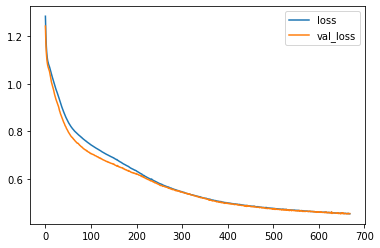

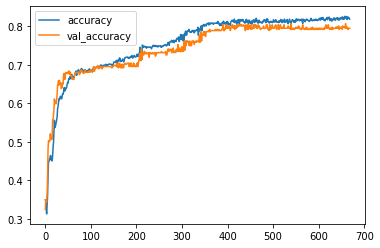

In [77]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

In [131]:
model2 = Sequential([
    Dense(32, activation='relu', input_shape=[13]),
    layers.BatchNormalization(),
    Dense(32, activation='relu'),
    layers.BatchNormalization(),
    Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    Dense(64, activation='relu'),
    layers.BatchNormalization(),
    Dense(64, activation='relu'),
    layers.BatchNormalization(),
    Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    Dense(128, activation='relu'),
    layers.BatchNormalization(),
    Dense(3, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
early_stopping2 = keras.callbacks.EarlyStopping(
    patience=25,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [132]:
history2 = model2.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=512,
    epochs=2000,
    callbacks=[early_stopping2],
    verbose=0
)

Evaluate on test data
1/1 [==============================] - 0s 25ms/step - loss: 0.1611 - accuracy: 0.9277
test loss, test acc: [0.16109080612659454, 0.9277108311653137]


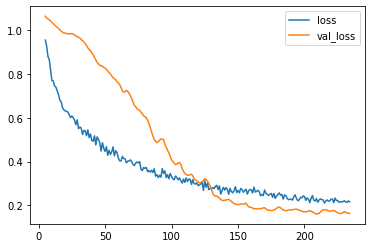

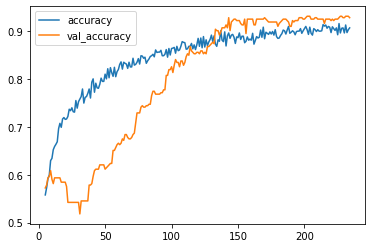

In [133]:
history_df2 = pd.DataFrame(history2.history)
# Start the plot at epoch 5
history_df2.loc[5:, ['loss', 'val_loss']].plot()
history_df2.loc[5:, ['accuracy', 'val_accuracy']].plot()

print("Evaluate on test data")
results2 = model2.evaluate(X_test, Y_test, batch_size=512)
print("test loss, test acc:", results2)